In [3]:
import sys
sys.path.append("../")

import os
%matplotlib inline
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from scipy import stats
import engarde.decorators as ed

#from library import test

In [4]:
data_path = '/Users/kylieleblancKylie/domino/dofis/data/'
table_path = '/Users/kylieleblancKylie/domino/dofis/results/Who Needs Rules/'
data = pd.read_csv(os.path.join(data_path, 'clean', 'gdid.csv'),
                  sep=",", low_memory= False)
#@ed.verify(test.allyearsandtpsd)
#def load():
 #   return data
#data = load()
#data[['distname', 'year', 'doi_year', 'treat', 'year_centered', 'students_hisp', 'students_num']][data.doi == True].head()

In [5]:
data[data.doi == False][['distname','doi', 'doi_year', 'year', 'treatpost']].head()

,distname,doi,doi_year,year,treatpost
0,A W BROWN-FELLOWSHIP LEADERSHIP AC,False,NaN,2012,False
1,A W BROWN-FELLOWSHIP LEADERSHIP AC,False,NaN,2012,False
2,A+ ACADEMY,False,NaN,2012,False
44,ACADEMY OF ACCELERATED LEARNING IN,False,NaN,2012,False
45,ACADEMY OF CAREERS AND TECHNOLOGIE,False,NaN,2012,False


In [6]:
data[data.year == 2014].doi_year.value_counts().sort_index()

2015.0       1
2016.0     923
2017.0    4205
2018.0     942
2019.0     202
Name: doi_year, dtype: int64

# Graph by year of implementation

In [7]:
def create_group_df(df):
    new_df = pd.DataFrame(df.groupby(['year']).agg({'avescores': ['mean', 'sem']}))
    new_df = new_df.rename(columns = {'mean': 'score_mean', 'sem': 'score_se'})
    new_df['ub'] = new_df['avescores']['score_mean'] + new_df['avescores']['score_se']
    new_df['lb'] = new_df['avescores']['score_mean'] - new_df['avescores']['score_se']
    return new_df
df_treat2016 = create_group_df(data[data.doi_year == 2016])
df_treat2017 = create_group_df(data[data.doi_year == 2017])
df_treat2018 = create_group_df(data[data.doi_year == 2018])
df_charter = create_group_df(data[data.distischarter == 'Y'])
df_treat2016

avescores                  ub        lb
     score_mean  score_se                    
year                                         
2012   0.050793  0.031254  0.082047  0.019539
2013   0.077618  0.032845  0.110463  0.044773
2014   0.115939  0.033330  0.149269  0.082609
2015   0.118642  0.033268  0.151910  0.085373
2016   0.294747  0.034080  0.328827  0.260667
2017   0.314032  0.036353  0.350385  0.277679
2018   0.399069  0.034802  0.433872  0.364267
2019   0.516416  0.034756  0.551172  0.481660

# Full Set of Years and Groups

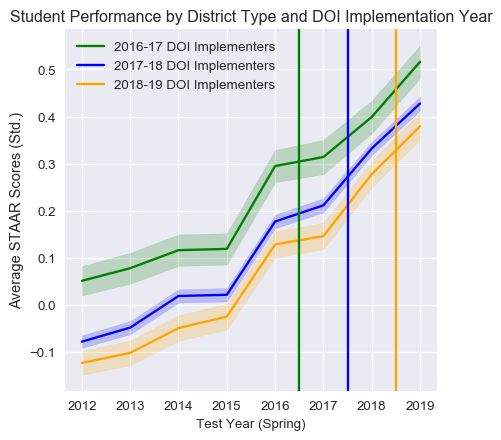

In [8]:
plt.style.use('seaborn')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)
years = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019] 
# Pre
#plt.plot(list(df_charter.index), df_charter['avescores']['score_mean'], color = 'yellow', label = 'Charter')
plt.plot(list(df_treat2016.index), df_treat2016['avescores']['score_mean'], color = 'green', label = '2016-17 DOI Implementers')
plt.plot(list(df_treat2017.index), df_treat2017['avescores']['score_mean'], color = 'blue', label = '2017-18 DOI Implementers')
plt.plot(list(df_treat2018.index), df_treat2018['avescores']['score_mean'], color = 'orange', label = '2018-19 DOI Implementers')

plt.legend()


plt.fill_between(list(df_treat2016.index), df_treat2016.lb, df_treat2016.ub, color = 'green', alpha = .2)
plt.fill_between(list(df_treat2017.index), df_treat2017.lb, df_treat2017.ub, color = 'blue', alpha = .2)
plt.fill_between(list(df_treat2018.index), df_treat2018.lb, df_treat2018.ub, color = 'orange', alpha = .2)

plt.axvline(x = 2016.5, color = 'green')
plt.axvline(x = 2017.5, color = 'blue')
plt.axvline(x = 2018.5, color = 'orange')



plt.ylabel('Average STAAR Scores (Std.)')
plt.title('Student Performance by District Type and DOI Implementation Year')
plt.xlabel('Test Year (Spring)', size = 'medium')


plt.savefig(table_path + 'all districts and dates.png', dpi = 600, bbox_inches="tight")
plt.show()

# Evidence of Parallel Trends

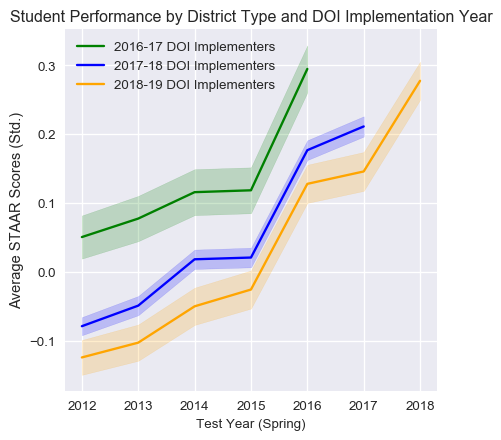

In [9]:
plt.style.use('seaborn')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

# Pre
plt.plot(list(df_treat2016[df_treat2016.index <= 2016].index), df_treat2016[df_treat2016.index <= 2016]['avescores']['score_mean'], color = 'green', label = '2016-17 DOI Implementers')
plt.plot(list(df_treat2017[df_treat2017.index <= 2017].index), df_treat2017[df_treat2017.index <= 2017]['avescores']['score_mean'], color = 'blue', label = '2017-18 DOI Implementers')
plt.plot(list(df_treat2018[df_treat2018.index <= 2018].index), df_treat2018[df_treat2018.index <= 2018]['avescores']['score_mean'], color = 'orange', label = '2018-19 DOI Implementers')

plt.legend()

plt.fill_between(list(df_treat2016[df_treat2016.index <= 2016].index), df_treat2016[df_treat2016.index <= 2016].lb, df_treat2016[df_treat2016.index <= 2016].ub, color = 'green', alpha = .2)
plt.fill_between(list(df_treat2017[df_treat2017.index <= 2017].index), df_treat2017[df_treat2017.index <= 2017].lb, df_treat2017[df_treat2017.index <= 2017].ub, color = 'blue', alpha = .2)
plt.fill_between(list(df_treat2018[df_treat2018.index <= 2018].index), df_treat2018[df_treat2018.index <= 2018].lb, df_treat2018[df_treat2018.index <= 2018].ub, color = 'orange', alpha = .2)


plt.ylabel('Average STAAR Scores (Std.)')
plt.title('Student Performance by District Type and DOI Implementation Year')
plt.xlabel('Test Year (Spring)', size = 'medium')

plt.savefig(table_path + 'parallel_trends_by_adoption.png', bbox_inches="tight")

plt.show()

# Visual Impact by Subject

In [10]:
def create_group_df(df, outcome):
    df['outcome'] = df[outcome]
    new_df = pd.DataFrame(df.groupby(['year']).agg({'outcome': ['mean', 'sem']}))
    new_df = new_df.rename(columns = {'mean': 'score_mean', 'sem': 'score_se'})
    new_df['ub'] = new_df['outcome']['score_mean'] + new_df['outcome']['score_se']
    new_df['lb'] = new_df['outcome']['score_mean'] - new_df['outcome']['score_se']
    return new_df

In [11]:
outcome = 'elem_reading'
df_treat2016 = create_group_df(data[data.doi_year == 2016], outcome = outcome)
df_treat2017 = create_group_df(data[data.doi_year == 2017], outcome = outcome)
df_treat2018 = create_group_df(data[data.doi_year == 2018], outcome = outcome)
df_charter = create_group_df(data[data.distischarter == 'Y'], outcome = outcome)
df_treat2016

/Users/kylieleblancKylie/anaconda/envs/spacy/lib/python3.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


outcome                  ub        lb
     score_mean  score_se                    
year                                         
2012   0.076779  0.039723  0.116502  0.037055
2013   0.060873  0.040591  0.101464  0.020283
2014   0.034611  0.040197  0.074808 -0.005586
2015   0.201619  0.042579  0.244198  0.159040
2016   0.288060  0.040932  0.328992  0.247128
2017   0.212658  0.045611  0.258269  0.167047
2018   0.353861  0.041950  0.395812  0.311911
2019   0.401768  0.041600  0.443368  0.360168

In [12]:
title_labels = {'avescores': 'Average STAR', 'elem_math': 'Elementary Math', 'elem_reading': 'Elementary Reading',
               'middle_math': 'Middle School Math', 'middle_reading': 'Middle School Reading',
               'biology': 'Biology', 'algebra': 'Algebra', 'eng1': 'English I'}

/Users/kylieleblancKylie/anaconda/envs/spacy/lib/python3.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


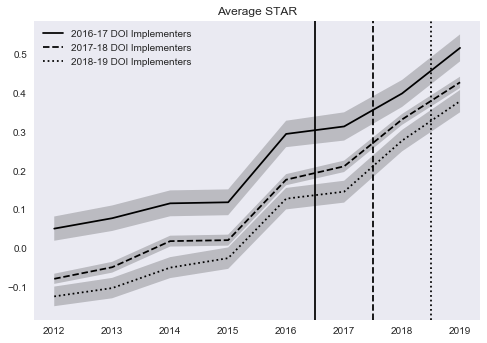

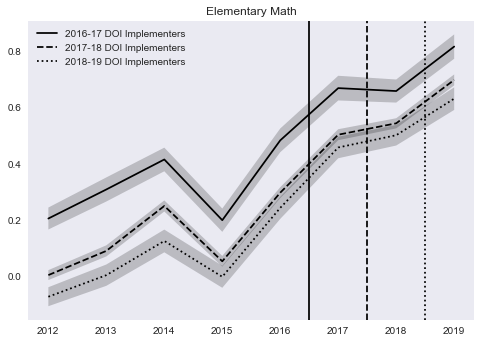

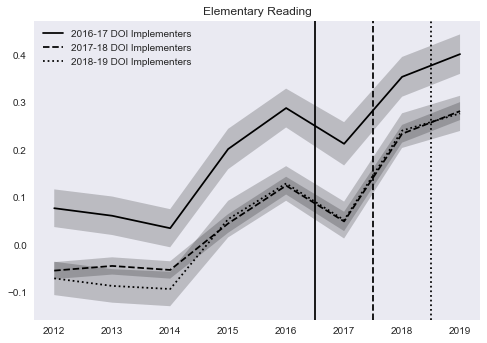

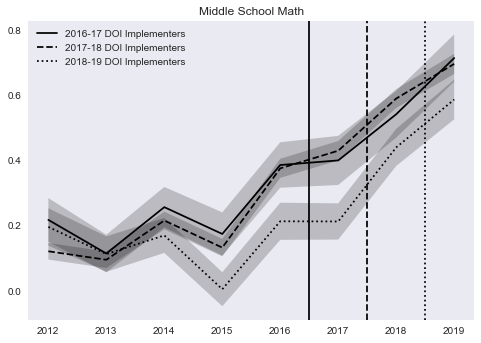

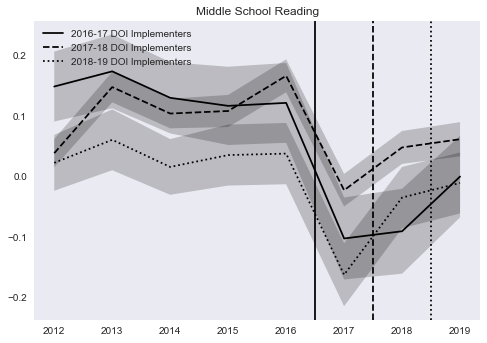

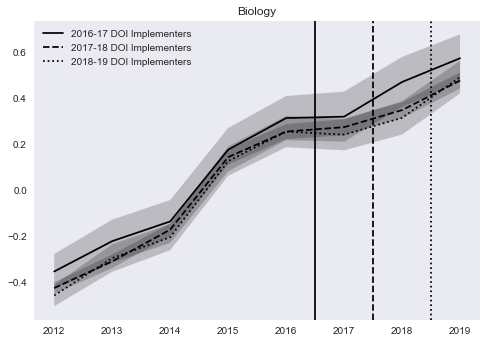

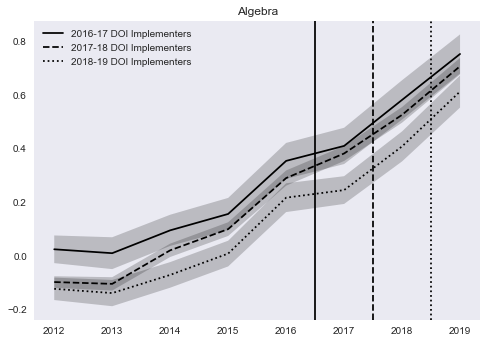

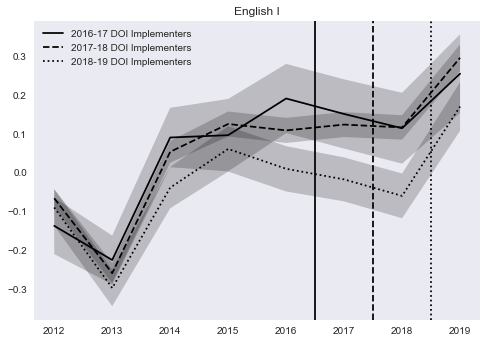

In [20]:
from matplotlib import lines, markers
from cycler import cycler
# Create cycler object. Use any styling from above you please
for outcome in ['avescores', 'elem_math', 'elem_reading', 'middle_math', 'middle_reading', 'biology', 'algebra', 'eng1']:
    df_treat2016 = create_group_df(data[data.doi_year == 2016], outcome = outcome)
    df_treat2017 = create_group_df(data[data.doi_year == 2017], outcome = outcome)
    df_treat2018 = create_group_df(data[data.doi_year == 2018], outcome = outcome)

    monochrome = (cycler('color', ['k']) * cycler('linestyle', ['-', '--', ':', '=.']))

    fig, ax = plt.subplots(1,1)
    ax.set_prop_cycle(monochrome)

    ax.plot(list(df_treat2016.index), df_treat2016['outcome']['score_mean'], label = '2016-17 DOI Implementers')
    ax.plot(list(df_treat2017.index), df_treat2017['outcome']['score_mean'],label = '2017-18 DOI Implementers')
    ax.plot(list(df_treat2018.index), df_treat2018['outcome']['score_mean'], label = '2018-19 DOI Implementers')

    ax.legend()


    ax.fill_between(list(df_treat2016.index), df_treat2016.lb, df_treat2016.ub, alpha = .2)
    ax.fill_between(list(df_treat2017.index), df_treat2017.lb, df_treat2017.ub, alpha = .2)
    ax.fill_between(list(df_treat2018.index), df_treat2018.lb, df_treat2018.ub, alpha = .2)

    ax.axvline(x = 2016.5, linestyle = '-', color = 'black')
    ax.axvline(x = 2017.5, linestyle = '--', color = 'black')
    ax.axvline(x = 2018.5, linestyle = ':', color = 'black')

    ax.set_title(title_labels[outcome])
    ax.grid(False)

    fig.savefig(table_path + 'trends_by_adoption_' + outcome + '.png', bbox_inches="tight")



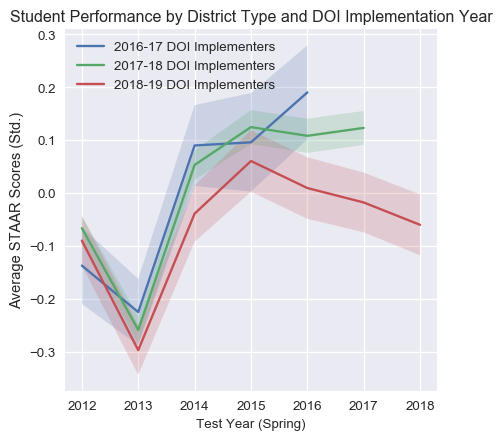

In [14]:
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

# Pre
plt.plot(list(df_treat2016[df_treat2016.index <= 2016].index), df_treat2016[df_treat2016.index <= 2016]['outcome']['score_mean'], label = '2016-17 DOI Implementers')
plt.plot(list(df_treat2017[df_treat2017.index <= 2017].index), df_treat2017[df_treat2017.index <= 2017]['outcome']['score_mean'], label = '2017-18 DOI Implementers')
plt.plot(list(df_treat2018[df_treat2018.index <= 2018].index), df_treat2018[df_treat2018.index <= 2018]['outcome']['score_mean'], label = '2018-19 DOI Implementers')

plt.legend()

plt.fill_between(list(df_treat2016[df_treat2016.index <= 2016].index), df_treat2016[df_treat2016.index <= 2016].lb, df_treat2016[df_treat2016.index <= 2016].ub, alpha = .2)
plt.fill_between(list(df_treat2017[df_treat2017.index <= 2017].index), df_treat2017[df_treat2017.index <= 2017].lb, df_treat2017[df_treat2017.index <= 2017].ub, alpha = .2)
plt.fill_between(list(df_treat2018[df_treat2018.index <= 2018].index), df_treat2018[df_treat2018.index <= 2018].lb, df_treat2018[df_treat2018.index <= 2018].ub, alpha = .2)


plt.ylabel('Average STAAR Scores (Std.)')
plt.title('Student Performance by District Type and DOI Implementation Year')
plt.xlabel('Test Year (Spring)', size = 'medium')

plt.savefig(table_path + 'parallel_trends_by_adoption' + outcome + '.png', bbox_inches="tight")

plt.show()

# Demographic Trends

In [15]:
df_control = pd.DataFrame(data[data.doi == False].groupby(['year'])['students_hisp'].mean()).reset_index()
df_treat2016 = pd.DataFrame(data[data.doi_year == 2016].groupby(['year'])['students_hisp'].mean()).reset_index()
df_treat2017 = pd.DataFrame(data[data.doi_year == 2017].groupby(['year'])['students_hisp'].mean()).reset_index()
df_treat2018 = pd.DataFrame(data[data.doi_year == 2018].groupby(['year'])['students_hisp'].mean()).reset_index()
df_treat2018

,year,students_hisp
0,2012,0.456906
1,2013,0.461966
2,2014,0.468864
3,2015,0.475006
4,2016,0.482534
5,2017,0.483492
6,2018,0.493682
7,2019,0.493682


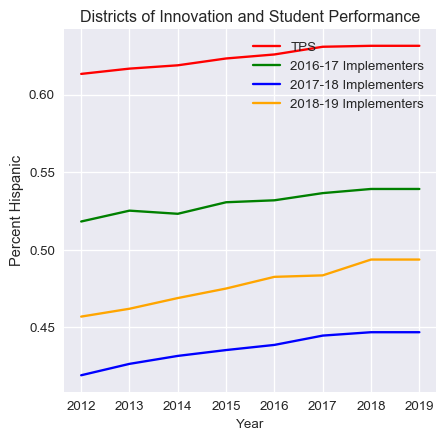

In [16]:
plt.style.use('seaborn')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

# Pre
plt.plot(df_control.year, df_control.students_hisp, color = 'red', label = 'TPS')
plt.plot(df_treat2016.year, df_treat2016.students_hisp, color = 'green', label = '2016-17 Implementers')
plt.plot(df_treat2017.year, df_treat2017.students_hisp, color = 'blue', label = '2017-18 Implementers')
plt.plot(df_treat2018.year, df_treat2018.students_hisp, color = 'orange', label = '2018-19 Implementers')

plt.legend()



plt.ylabel('Percent Hispanic')
plt.title('Districts of Innovation and Student Performance')
plt.xlabel('Year', size = 'medium')

#plt.savefig(table_path + 'CITS.png', bbox_inches="tight")

plt.show()

In [17]:
df_control = pd.DataFrame(data[data.doi == False].groupby(['year'])['students_num'].mean()).reset_index()
df_treat2016 = pd.DataFrame(data[data.doi_year == 2016].groupby(['year'])['students_num'].mean()).reset_index()
df_treat2017 = pd.DataFrame(data[data.doi_year == 2017].groupby(['year'])['students_num'].mean()).reset_index()
df_treat2018 = pd.DataFrame(data[data.doi_year == 2018].groupby(['year'])['students_num'].mean()).reset_index()
df_treat2018

,year,students_num
0,2012,593.475289
1,2013,600.559072
2,2014,610.608280
3,2015,611.183351
4,2016,615.729958
5,2017,614.522013
6,2018,621.020063
7,2019,621.020063


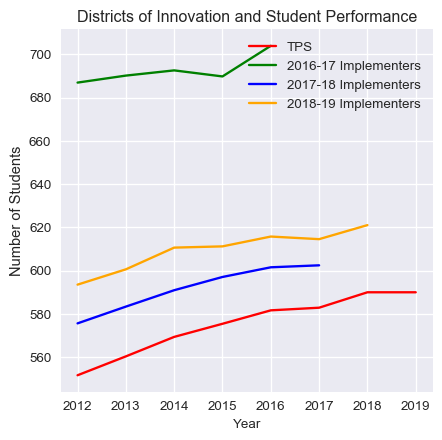

In [18]:
plt.style.use('seaborn')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

# Pre
plt.plot(df_control.year, df_control.students_num, color = 'red', label = 'TPS')
plt.plot(df_treat2016[df_treat2016.year <= 2016].year, df_treat2016[df_treat2016.year <= 2016].students_num, color = 'green', label = '2016-17 Implementers')
plt.plot(df_treat2017[df_treat2017.year <= 2017].year, df_treat2017[df_treat2017.year <= 2017].students_num, color = 'blue', label = '2017-18 Implementers')
plt.plot(df_treat2018[df_treat2018.year <= 2018].year, df_treat2018[df_treat2018.year <= 2018].students_num, color = 'orange', label = '2018-19 Implementers')

plt.legend()



plt.ylabel('Number of Students')
plt.title('Districts of Innovation and Student Performance')
plt.xlabel('Year', size = 'medium')

#plt.savefig(table_path + 'CITS.png', bbox_inches="tight")

plt.show()

In [19]:
#  Who are 2016-17 implementers
data[(data.doi_year == 2016) & (data.year == 2018)][['distname', 'students_num']]


,distname,students_num
51746,PALESTINE ISD,966
51747,PALESTINE ISD,504
51748,PALESTINE ISD,504
51749,PALESTINE ISD,191
51750,PALESTINE ISD,488
51751,PALESTINE ISD,761
51756,SLOCUM ISD,114
51757,SLOCUM ISD,309
51830,LYTLE ISD,447
51831,LYTLE ISD,5
